In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [45]:
df = pd.read_csv('Used_Cars_Dataset.csv', encoding='ISO-8859-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


In [46]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          11111 non-null  object
 1   name                 11111 non-null  object
 2   seller               11111 non-null  object
 3   offerType            11111 non-null  object
 4   price                11111 non-null  int64 
 5   abtest               11111 non-null  object
 6   vehicleType          9906 non-null   object
 7   yearOfRegistration   11111 non-null  int64 
 8   gearbox              10500 non-null  object
 9   powerPS              11111 non-null  int64 
 10  model                10531 non-null  object
 11  kilometer            11111 non-null  int64 
 12  monthOfRegistration  11111 non-null  int64 
 13  fuelType             10073 non-null  object
 14  brand                11111 non-null  object
 15  notRepairedDamage    8939 non-null   object
 16  date

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            1205
yearOfRegistration        0
gearbox                 611
powerPS                   0
model                   580
kilometer                 0
monthOfRegistration       0
fuelType               1038
brand                     0
notRepairedDamage      2172
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [47]:
df.drop(['dateCrawled', 'name', 'seller', 'offerType', 'abtest',
         'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen', 'model'],
        axis=1, inplace=True)

In [48]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [49]:
df['carAge'] = 2025 - df['yearOfRegistration']
df.drop('yearOfRegistration', axis=1, inplace=True)


In [50]:
df['notRepairedDamage'] = df['notRepairedDamage'].map({'nein': 0, 'ja': 1})
df = pd.get_dummies(df, drop_first=True)


In [51]:
X = df.drop('price', axis=1)
y = df['price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [54]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [55]:
print(" Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

 Linear Regression Results:
R² Score: 0.5820030588675156
MAE: 3274.4088161335208
RMSE: 5449.249000297519


In [56]:
print("\n Random Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


 Random Forest Results:
R² Score: 0.7165820250804535
MAE: 1912.118373549965
RMSE: 4487.079835057235


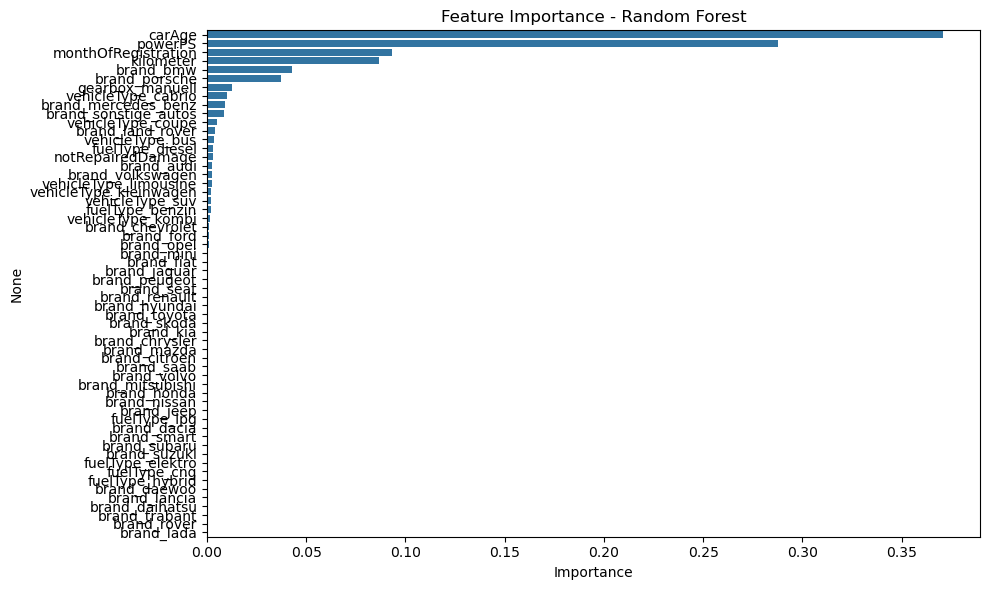

In [57]:
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.sort_values(ascending=False), y=feat_importance.sort_values(ascending=False).index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


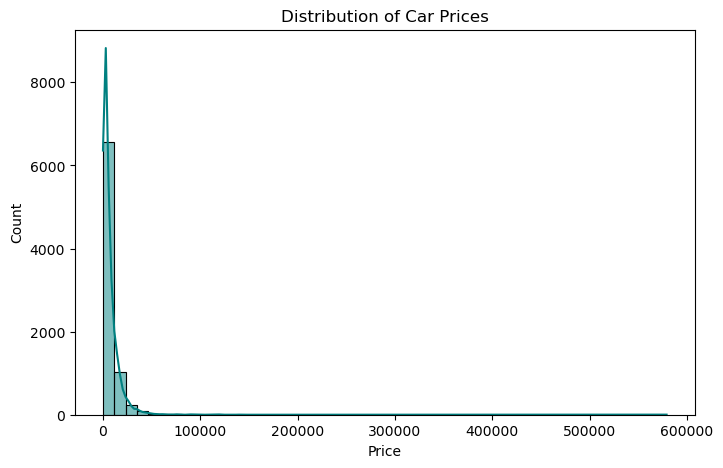

In [58]:
# Distribution of car prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins=50, color='teal')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


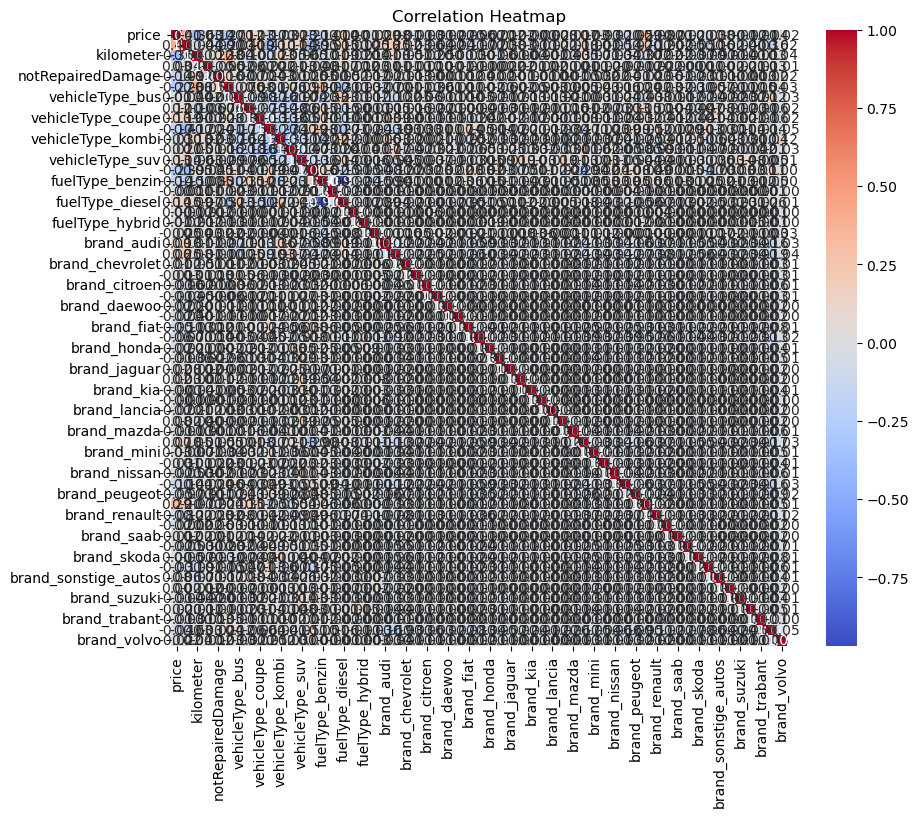

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

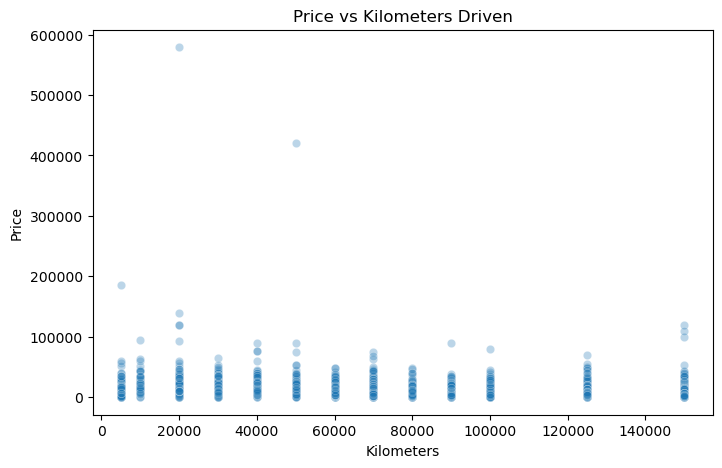

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='kilometer', y='price', data=df, alpha=0.3)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()

In [81]:
# Create a DataFrame comparing actual and predicted prices
predictions_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price (Random Forest)': y_pred_rf,
    'Predicted Price (Linear Regression)': y_pred_lr
})

predictions_df.head(25)


,Actual Price,Predicted Price (Random Forest),Predicted Price (Linear Regression)
0,6400,6565.760000,7510.294209
1,4590,4291.250000,7771.861148
2,950,1103.510000,1696.704482
3,2600,5332.690000,5471.180541
4,2700,3122.296667,4989.182322
5,4350,3325.890000,2958.500640
6,1950,2032.696667,4421.401348
7,13900,16145.670000,9863.065419
8,1600,1269.310000,5758.309792
9,12000,13880.430000,17097.912636
